In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_3300/1799346089.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv("../dataset/ex2data1.txt", delimiter=",")

In [12]:
df['intercept'] = 1

# Memisahkan fitur (x) dan target (y)
# Memisahkan fitur (x, y) dan variabel target (label)
X = df[['intercept', 'x', 'y']]
y = df['kategory']


In [6]:
logit_model = sm.Logit(y, X)

In [7]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations 9


In [8]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               kategory   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.6976
Time:                        11:44:47   Log-Likelihood:                -20.350
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                 4.067e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -25.1613      5.799     -4.339      0.000     -36.526     -13.796
x              0.2062      0.048      4.296      0.000       0.112       0.300
y              0.2015      0.049      4.143      0.0

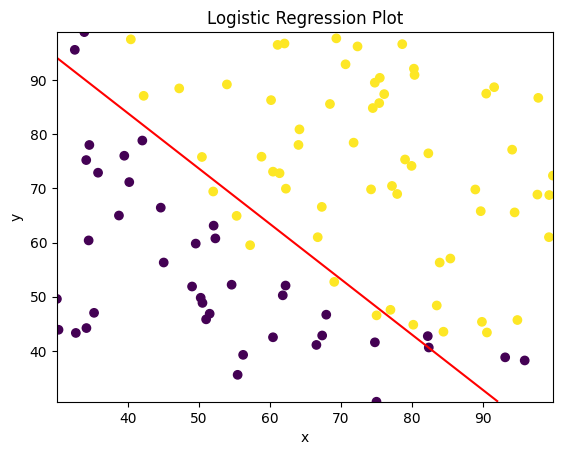

In [9]:
# Plot data
plt.scatter(df['x'], df['y'], c=df['kategory'], cmap='viridis')

# Plot garis pemisah
x_values = np.linspace(df['x'].min(), df['x'].max(), 100)
y_values = np.linspace(df['y'].min(), df['y'].max(), 100)
X_grid, Y_grid = np.meshgrid(x_values, y_values)
Z = result.predict(sm.add_constant(np.column_stack((X_grid.ravel(), Y_grid.ravel()))))
Z = Z.reshape(X_grid.shape)
plt.contour(X_grid, Y_grid, Z, levels=[0.5], colors='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression Plot')
plt.show()


In [10]:

# Fungsi untuk melakukan prediksi
def predict_label(x_value, y_value):
    input_data = [1, x_value, y_value]  # Intercept, x, dan y
    predicted_probability = result.predict(input_data)
    predicted_label = True if predicted_probability >= 0.5 else False
    return predicted_label, predicted_probability

# Contoh prediksi untuk nilai x=2 dan y=3
predicted_label, predicted_probability = predict_label( 0,0)
print("Predicted Label:", predicted_label)
print("score :", predicted_probability)

Predicted Label: False
score : [1.18187535e-11]


/Users/max/Desktop/learningML/.env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


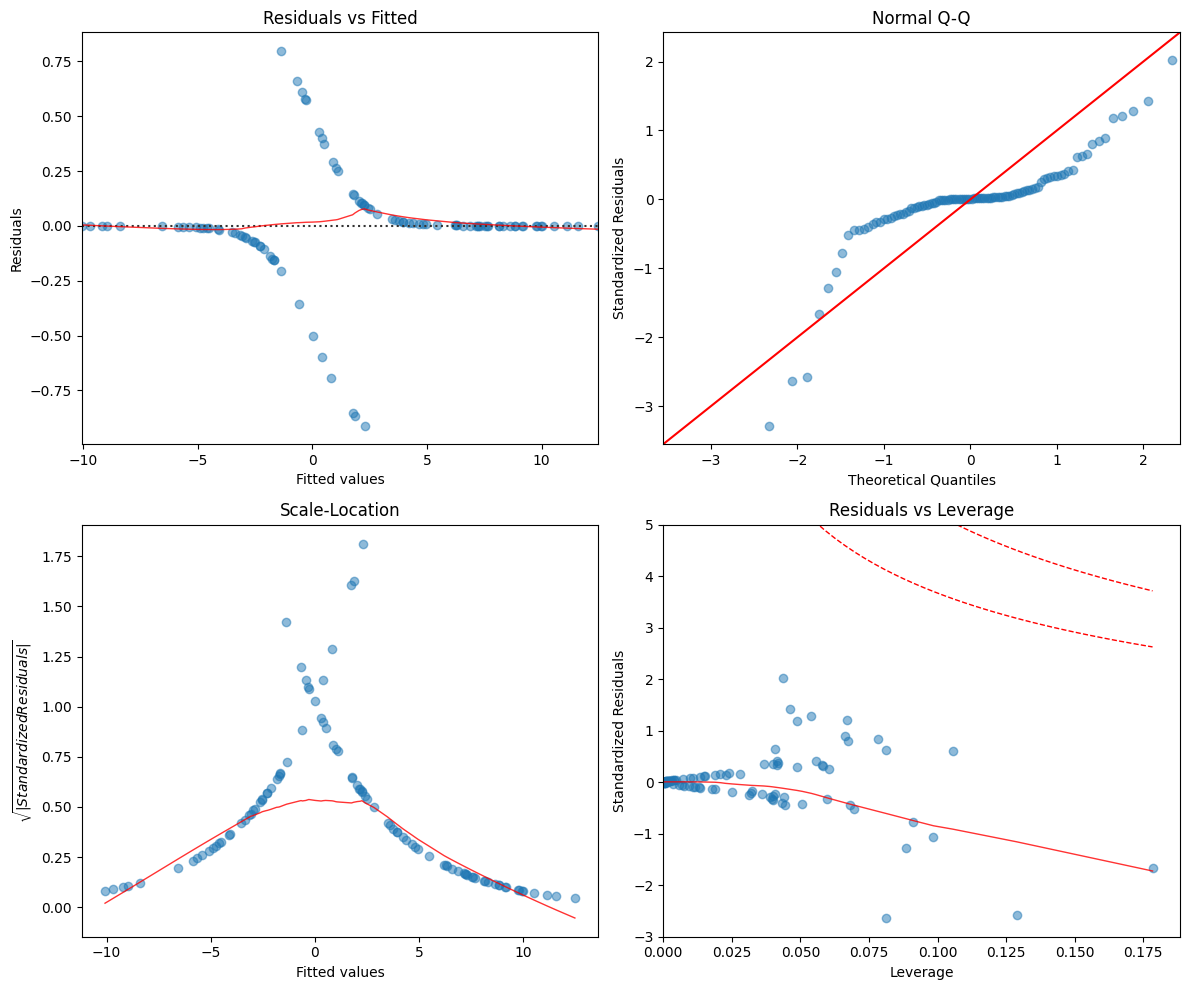

In [11]:
import sys
import os

# Menambahkan path ke folder yang berisi script2.py
sys.path.append(os.path.abspath('../my_package'))
from diagnosticPlotLogistic import logistic_diagnostic_plots
logistic_diagnostic_plots(df['x'], df['y'], result)